In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
#Extract the data
data = load_iris()
X = data.data
y = data.target

In [38]:
#Preprocessing
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [44]:
#Create train and test data
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.3,random_state=21)

In [45]:
#Instantiate the model
svm = SVC(kernel='linear',C=1.0,random_state=0)

In [46]:
#Fit the training data
svm.fit(X_train[:,[2,3]],y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
#Defining function to plot the data points and decision boundry

marker = ('s','^','*')
colors = ['red','green','blue','gray']
cmap = ListedColormap(colors[:len(np.unique(y))])
    
def plot_decision_boundry(X,y,classifier):
    X1_min,X1_max = X[:,2].min() - 1,X[:,2].max() + 1
    X2_min,X2_max = X[:,3].min() - 1,X[:,3].max() + 1
    XX1,XX2 = np.meshgrid(np.arange(X1_min,X1_max,0.02),np.arange(X2_min,X2_max,0.02))
    z = classifier.predict(np.array([XX1.ravel(),XX2.ravel()]).T)
    z = z.reshape(XX1.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(XX1,XX2,z,alpha=0.3,cmap=cmap)
    plt.title('SVM Decision boundry')
    for idx,clas in enumerate(np.unique(y)):
        plt.scatter(X[y==clas,2],X[y==clas,3],alpha=1,marker=marker[idx],label=clas)
    plt.legend(loc='upper left')
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.show()

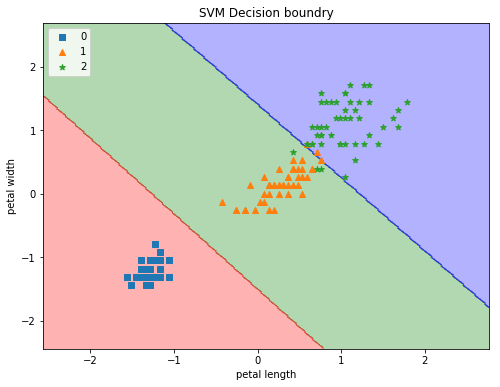

In [66]:
plot_decision_boundry(X=np.vstack((X_train,X_test)),y=np.hstack((y_train,y_test)),classifier=svm)